In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
data = pd.read_csv('data/Clustering_test2', names=['x', 'y'], delim_whitespace=True)

In [3]:
data

,x,y
0,44.347338,31.238228
1,50.600187,52.091475
2,70.710953,18.118381
3,62.951489,24.209507
4,75.496735,21.494209
5,61.130026,18.073440
6,45.751734,60.432213
7,91.897881,31.879572
8,74.310788,57.432832
9,65.768167,14.898304


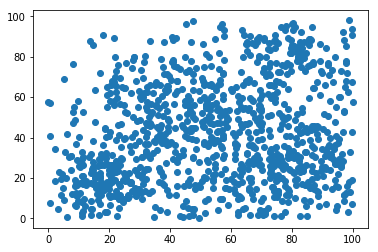

In [4]:
plt.scatter(data['x'], data['y'])

In [5]:
eps = 5
MinPts = 12

In [6]:
ptses = []
dist = euclidean_distances(data)

In [7]:
len(dist)

1034

In [8]:
for row in dist:
    density = np.sum(row < eps)
    pts = 0
    if density > MinPts:
        pts = 1 # core points
    elif density > 1:
        pts = 2 # border point
    else:
        pts = 0 # Noise 
    ptses.append(pts)

In [9]:
corePoints = data[pd.Series(ptses) != 0]
corePoints

,x,y
0,44.347338,31.238228
1,50.600187,52.091475
2,70.710953,18.118381
3,62.951489,24.209507
4,75.496735,21.494209
5,61.130026,18.073440
6,45.751734,60.432213
7,91.897881,31.879572
8,74.310788,57.432832
9,65.768167,14.898304


In [10]:
coreDist = euclidean_distances(corePoints)
coreDist.shape

(1030, 1030)

In [11]:
cluster = dict()
i = 0
for row in coreDist: 
    cluster[i] = np.where(row < eps)[0]
    i += 1

In [12]:
cluster

{0: array([  0,  19, 152, 197, 209, 226, 391, 458, 611, 983], dtype=int64),
 1: array([   1,   12,  195,  302,  341,  359,  390,  452,  613,  912,  953,
         954,  968,  984, 1000, 1004], dtype=int64),
 2: array([  2,  11, 140, 142, 173, 285, 321, 401, 548, 636, 688, 689],
       dtype=int64),
 3: array([  3,  16, 307, 308, 309, 335, 404, 405, 579, 657, 665], dtype=int64),
 4: array([  4, 142, 173, 223, 271, 285, 317, 321, 339, 401, 403, 576, 655,
        664, 688, 719, 733], dtype=int64),
 5: array([   5,   52,  220,  307,  324,  463,  591,  634,  665, 1015, 1023],
       dtype=int64),
 6: array([  6,  34,  39,  80, 177, 208, 213, 349, 397, 462, 590, 619, 984],
       dtype=int64),
 7: array([  7,  50,  99, 178, 201, 279, 290, 328, 481, 482, 512, 596, 713,
        729, 874, 986, 989], dtype=int64),
 8: array([   8,  267,  346,  938,  949, 1025], dtype=int64),
 9: array([   9,   52,  136,  324,  338,  548,  602,  636, 1023], dtype=int64),
 10: array([ 10,  92, 127, 227, 241, 244, 2

In [13]:
for i in range(len(cluster)):
    for j in range(len(cluster)):
        if len(set(cluster[j]) & set(cluster[i]))>0 and i!=j:
            cluster[i] = list(set(cluster[i]) | set(cluster[j]))
            cluster[j] = list()

In [14]:
cluster

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  94,
  95,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  132,
  1

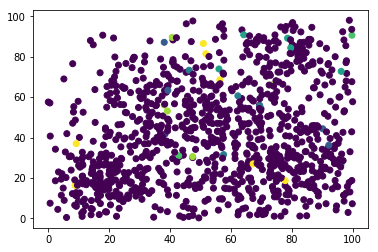

In [15]:
result = dict()
j = 0
for i in range(len(cluster)):
    if len(cluster[i])>0:
        result[j] = cluster[i]
        j = j + 1

for i in range(len(result)):
    for j in result[i]:
        data.at[j, 'type'] = i

plt.scatter(data['x'], data['y'], c=data['type'])

In [16]:
data[:100]

,x,y,type
0,44.347338,31.238228,0.0
1,50.600187,52.091475,0.0
2,70.710953,18.118381,0.0
3,62.951489,24.209507,0.0
4,75.496735,21.494209,0.0
5,61.130026,18.073440,0.0
6,45.751734,60.432213,0.0
7,91.897881,31.879572,0.0
8,74.310788,57.432832,0.0
9,65.768167,14.898304,0.0


In [17]:
max(data['type'])

7.0

In [18]:
len(dist)

1034

In [19]:
coreDist.shape

(1030, 1030)

In [20]:
result

{0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  94,
  95,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161